In [1]:
import pandas as pd
import seaborn as sb
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium import plugins
from geopy.geocoders import Nominatim
import datetime
import statsmodels.api as sm

In [110]:
df = pd.read_csv('microplastics-in-ocean.csv')
df.head()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Yearly Microplastics Emission
0,1950,0,0
1,1951,0,0
2,1952,0,0
3,1953,0,0
4,1954,100,100


In [97]:
# df.describe()
# df.isnull().any()

In [111]:
df = df.loc[(df['Year'] >= 1974) & (df['Year'] <= 2004)]
df.insert(0, 'Time', range(1, 1 + len(df)))
df = df.drop(["Accumulated ocean plastic: Microplastics (<0.5cm)"], axis = 1)
df.head()

,Time,Year,Yearly Microplastics Emission
24,1,1974,1400
25,2,1975,1500
26,3,1976,1800
27,4,1977,2000
28,5,1978,2200


In [104]:
df_female = pd.read_csv("female-pop.csv")
df_female = df_female.groupby("Year").sum()
df_female = df_female.reset_index()
df_female = df_female.loc[(df_female['Year'] >= 1980) & (df_female['Year'] <= 2010)]
df_female = df_female.reset_index()
df_female = df_female.drop(columns = ["index"])
df_female.head()

,Year,PopFemale
0,1980,8.682137e+07
1,1981,8.839908e+07
2,1982,9.000685e+07
3,1983,9.165150e+07
4,1984,9.334087e+07


In [105]:
df_cancer = pd.read_csv('cancer.csv')
df_cancer = df_cancer.loc[(df_cancer['Year'] >= 1980) & (df_cancer['Year'] <= 2010)]
df_cancer['Cancer Rate'] = df_cancer.sum(axis=1) - df_cancer["Year"]
df_cancer = df_cancer.reset_index()
df_cancer = df_cancer.drop(columns = ["index"])
df_cancer = pd.concat([df_cancer['Year'], df_cancer['Cancer Rate']], axis = 1)
df_cancer["Cancer Rate"] = df_cancer["Cancer Rate"]/ df_female["PopFemale"] *100
df_cancer.head()

,Year,Cancer Rate
0,1980,0.069059
1,1981,0.069346
2,1982,0.075905
3,1983,0.090922
4,1984,0.092270


In [108]:
len(df_cancer)

31

In [112]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())
# print(model_fit.rsquared)
# print(model_fit.rsquared_adj)
# print(model_fit.pvalues)
# print(model_fit.params)

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     216.7
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           5.44e-15
Time:                        16:58:53   Log-Likelihood:                 95.710
No. Observations:                  31   AIC:                            -187.4
Df Residuals:                      29   BIC:                            -184.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:xlabel='Yearly Microplastics Emission', ylabel='Cancer Rate'>

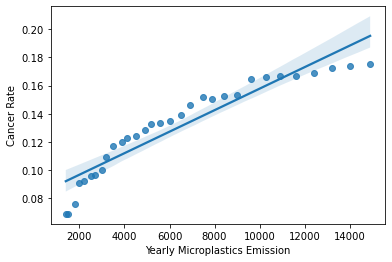

In [125]:
sb.regplot(x=X["Yearly Microplastics Emission"], y=y)

In [113]:
female_df = pd.read_csv('female-bmi.csv')
female_df = female_df.loc[(female_df['Year'] >= 1975) & (female_df['Year'] <= 2005)]
female_df = female_df.groupby(['Year']).median()
female_df = female_df.reset_index()

In [115]:
alcohol_df = pd.read_csv('alcohol.csv')
alcohol_df = alcohol_df.loc[(alcohol_df['Year'] >= 1972) & (alcohol_df['Year'] <= 2002)]
alcohol_df = alcohol_df.groupby("Year").sum()
alcohol_df = alcohol_df.reset_index()
alcohol_df = alcohol_df.drop(columns = "Year")
alcohol_df["AlcAmt"] = alcohol_df["AlcAmt"]/2
alcohol_df.head()

,AlcAmt
0,747.230
1,784.310
2,787.020
3,796.570
4,796.565


In [116]:
smoke_df = pd.read_csv('smoke.csv')
smoke_df = smoke_df.loc[(smoke_df['Year'] >= 1972) & (smoke_df['Year'] <= 2002)]
smoke_df = smoke_df.groupby("Year").median()
smoke_df = smoke_df.reset_index()
smoke_df = smoke_df.drop(columns = "Year")
smoke_df.head()

,Cig/Adult/Day
0,6.60
1,7.15
2,7.40
3,6.95
4,7.35


In [117]:
age_df = pd.read_csv('age.csv')
age_df = age_df.loc[(age_df['Year'] >= 1980) & (age_df['Year'] <= 2010)]
age_df = age_df.reset_index()
age_df = age_df.drop(columns = ["Year", "index"])
age_df.head()

,MedianAge
0,23.724996
1,23.907336
2,24.089675
3,24.272015
4,24.454354


In [74]:
len(smoke_df)

33

In [119]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     216.7
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           5.44e-15
Time:                        16:59:13   Log-Likelihood:                 95.710
No. Observations:                  31   AIC:                            -187.4
Df Residuals:                      29   BIC:                            -184.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [121]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

# bmi df refactoring
# female_df = female_df.drop(columns = ["index", "level_0"])
female_df = female_df.reset_index()

X = pd.concat([X, female_df], axis = 1)
# X = X.drop(columns = ["Year"])
X = X.drop(columns = ["index", "Year"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1124.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.82e-27
Time:                        16:59:21   Log-Likelihood:                 130.76
No. Observations:                  31   AIC:                            -255.5
Df Residuals:                      28   BIC:                            -251.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [124]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

# bmi df refactoring
female_df = female_df.drop(columns = ["index", "level_0"])
female_df = female_df.reset_index()

# X = pd.concat([X, bmi_df, alcohol_df], axis = 1)
# X = pd.concat([X, female_df, alcohol_df, smoke_df], axis = 1)
X = pd.concat([X, female_df, alcohol_df, smoke_df, age_df], axis = 1)
X = X.drop(columns = ["index", "Year"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     668.0
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           9.25e-26
Time:                        16:59:35   Log-Likelihood:                 138.57
No. Observations:                  31   AIC:                            -265.1
Df Residuals:                      25   BIC:                            -256.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [85]:
X = X.drop(columns = "const")
new = pd.DataFrame()
new = pd.concat([X, y], axis = 1)
new.corr()

,Yearly Microplastics Emission,Mean BMI (female),AlcAmt,Cig/Adult/Day,MedianAge,Cancer Rate
Yearly Microplastics Emission,1.000000,0.967815,0.782548,-0.890977,0.976687,0.910857
Mean BMI (female),0.967815,1.000000,0.797399,-0.901344,0.998860,0.979640
AlcAmt,0.782548,0.797399,1.000000,-0.754475,0.805822,0.811309
Cig/Adult/Day,-0.890977,-0.901344,-0.754475,1.000000,-0.905182,-0.868035
MedianAge,0.976687,0.998860,0.805822,-0.905182,1.000000,0.975248
Cancer Rate,0.910857,0.979640,0.811309,-0.868035,0.975248,1.000000


In [89]:
X.columns

Index(['Yearly Microplastics Emission', 'Mean BMI (female)', 'AlcAmt',
       'Cig/Adult/Day', 'MedianAge'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='Yearly Microplastics Emission'>

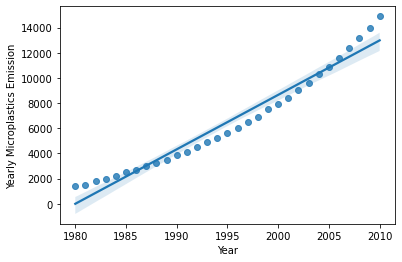

In [130]:
sb.regplot(y=X["Yearly Microplastics Emission"], x=df_cancer["Year"])

<AxesSubplot:xlabel='Year', ylabel='Cancer Rate'>

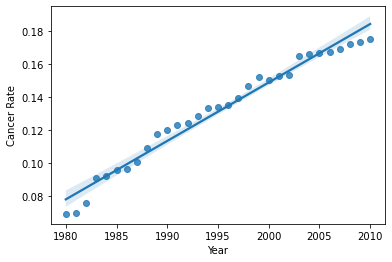

In [131]:
sb.regplot(y=y, x=df_cancer["Year"])